In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [14]:
img_array = cv2.imread('train/0/Training_178362.jpg')

In [15]:
img_array.shape

(48, 48, 3)

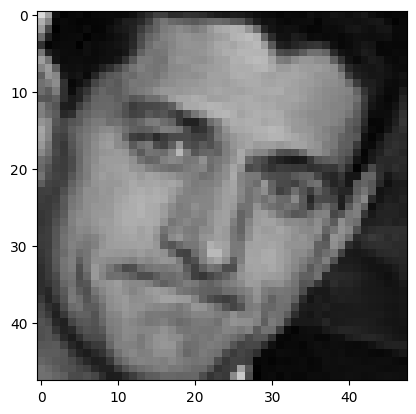

In [16]:
plt.imshow(img_array)

In [17]:
dataDirectory = 'train/'

In [18]:
classes = ["0","1","2","3","4","5","6"]

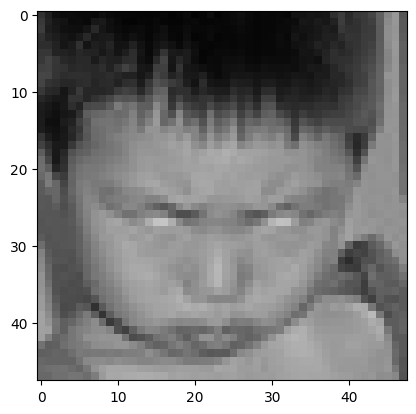

In [19]:
for category in classes:
    path = os.path.join(dataDirectory, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = cv2.imread(img_path)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.show()
        break
    break

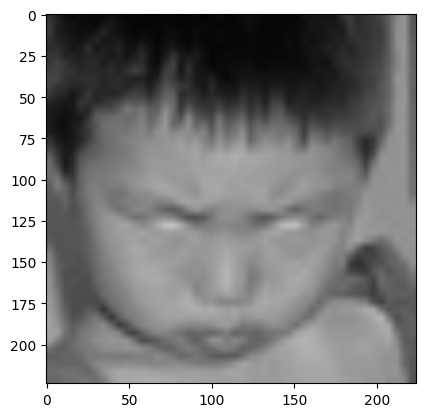

In [20]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
new_array.shape

(224, 224, 3)

In [22]:
training_Data= [] 
def create_training_Data():
    for category in classes:
        path = os.path.join(dataDirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))  # Fix the typo here
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [23]:
create_training_Data()

In [24]:
print(len(training_Data))

28709


In [ ]:
temp = np.array(training_Data)

In [26]:
temp.shape

(28709, 2)

In [27]:
import random
random.shuffle(training_Data)

In [28]:
X = []
y = [] 
for features, label in training_Data:
    X.append (features)
    y.append(label)
X=np.array(X) . reshape(-1, img_size, img_size, 3)

In [29]:
X.shape

(28709, 224, 224, 3)

In [ ]:
X = X/255.0

In [165]:
type(y)

list

In [167]:
Y = np.array(y)

In [168]:
Y.shape

(28709,)

In [169]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [170]:
model = tf.keras.applications.MobileNetV2()

14536120/14536120 [==============================] - 7s 0us/step


In [171]:
model.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x000002026C630E50>>

In [172]:
base_input = model.layers[0].input

In [173]:
base_output = model.layers[-2].output

In [174]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [176]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu') (final_output) ## activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation = 'softmax')(final_output)

In [177]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_3')>

In [178]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.summary()

In [180]:
new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam" ,metrics= ["accuracy"] )

In [ ]:
new_model.fit(X,Y,epochs= 15)

In [182]:
new_model.save('weights/model_weight.h5')

In [2]:
new_model  = tf.keras.models.load_model('weights/model_weight.h5')

In [3]:
frame = cv2.imread('happyboy.jpg')

In [4]:
frame.shape

(656, 990, 3)

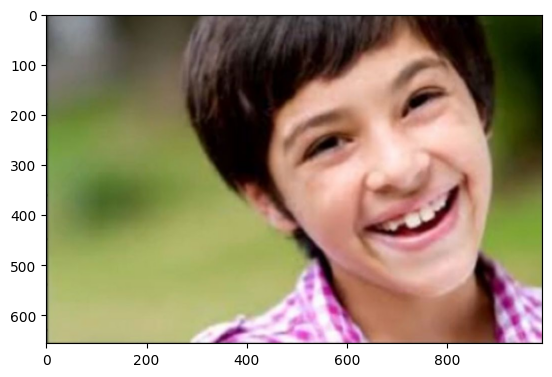

In [5]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [6]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [7]:
gray = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)

In [8]:
gray.shape

(656, 990)

In [11]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x: x+w]
    roi_color = frame[y:y+h, x: x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h),(0, 255, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey, ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh , ex:ex + ew]

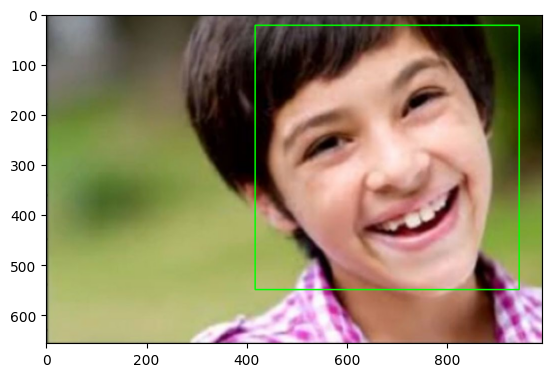

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [13]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image =  final_image/255.0

In [14]:
predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 966ms/step


In [15]:
predictions[0]

array([1.8126056e-02, 7.2574568e-07, 3.8752668e-02, 5.0122659e-03,
       3.3405501e-01, 6.0199386e-01, 2.0594499e-03], dtype=float32)

In [16]:
np.argmax(predictions)

5